## **PRODIGY INFOTECH - DATASCIENCE INTERNSHIP**

### **TASK O3 - PREDICTION USING DECISION TREE CLASSIFIER**

### **AUTHOR - ARYA S**

### **DATASET - BANK MARKETING** 


### **STEP 1- Import Libraries**

In [278]:
# importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report





- **Pandas:** For data manipulation and analysis.
- **NumPy:** For numerical operations.
- **Matplotlib & Seaborn:** For data visualization.
- **Scikit-learn Libraries:**
  - **LabelEncoder:** For encoding target labels.
  - **train_test_split:** To split the dataset into training and testing sets.
  - **DecisionTreeClassifier:** To build the decision tree model.
  - **classification_report & confusion_matrix:** For evaluating the model.
  - **plot_tree:** For visualizing the decision tree.

### **STEP 2- Import Dataset**

In [279]:
#import dataset
df = pd.read_csv("bank.csv", sep=';')
df

age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous poutcome   y  
0     cellular   19   oct        79         1     -1         0  unknown  no  
1     cellular   11   may       220         1    339         4  failure  no  
2     cellular   16   apr       185         1    330         1  failure  no  
3      unknown    3   jun       199         4     -1         0  unknown  no  
4      unknown    5   may       226         1     -1         0  unknown  no  
...        ...  ...   ...       ...       ...    ...       ...      ...  ..  
4516  cellular   30   jul       329         5     -1         0  unknown  no  
4517   unknown    9   may       153         1     -1         0  unknown  no  
4518  cellular   19   aug       151        11     -1         0  unknown  no  
4519  cellular    6   feb       129         4    211         3    other  no  
4520  cellular    3   apr       345         2    249         7    other  no  

[4521 rows x 17 columns]

### ***STEP 3 -Exploratory Data Analysis***

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [281]:
df.describe()

age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000

In [282]:
df.shape

(4521, 17)

In [283]:
# Handle missing values
df = df.dropna()

In [284]:
df.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

- **Dataset Information:**
  - `iris.info()` gives a summary of the dataset including data types and non-null counts.
- **Descriptive Statistics:**
  - `iris.describe()` provides statistical summary for numerical columns.
- **Shape of Dataset:**
  - `iris.shape` shows the dimensions of the dataset (number of rows and columns).
- **Missing Values:**
  - `iris.isnull().any()` checks for any missing values in the dataset.

### **STEP 4 - Encode Categorical Variables**

In [288]:
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])


- This code snippet transforms categorical variables in the DataFrame `df` into numerical values. It uses `LabelEncoder` from `sklearn.preprocessing` to encode each categorical column. 
    
- This process prepares categorical data for machine learning models that require numerical input.


### STEP 5 : Split Data into Features and Target

In [289]:
# Split the data into features and target variable
X = df.drop('y', axis=1)
y = df['y']


The code separates the dataset into features (`X`) and the target variable (`y`):
- **`X`**: Contains all columns except the target column 'y'.
- **`y`**: Contains the target variable 'y', which indicates whether the customer will buy the service.

This split prepares the data for training and testing machine learning models.


### STEP 6: Split Data into Training and Testing Sets

In [290]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


The dataset is divided into training and testing sets:
- **`X_train`, `y_train`**: Used for training the model.
- **`X_test`, `y_test`**: Used for evaluating the model.

The split is 70% training and 30% testing, with a fixed random seed for reproducibility.


### STEP 7: Train a Decision Tree Classifier & make predictions

In [291]:
# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [292]:
# Make predictions
y_pred = clf.predict(X_test)



- **Train**: A `DecisionTreeClassifier` is trained on the training data (`X_train`, `y_train`).
- **Predict**: Predictions are made on the test data (`X_test`).


### STEP 8: Evaluate the Model - confusion matrix & accuracy  score 
 

In [293]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print('Confusion Matrix:')
print(conf_matrix)


print(f'Accuracy: {accuracy * 100:.2f}%')

Confusion Matrix:
[[1110   95]
 [  93   59]]
Accuracy: 86.15%


- **Accuracy**: 86.15%

### Insights

- **True Positives (TP)**: 59 (correctly predicted 'Yes')
- **True Negatives (TN)**: 1110 (correctly predicted 'No')
- **False Positives (FP)**: 95 (incorrectly predicted 'Yes')
- **False Negatives (FN)**: 93 (incorrectly predicted 'No')

- **High Accuracy**: The model correctly predicts outcomes 86.15% of the time.
- **Class Imbalance**: The model performs better at predicting 'No' compared to 'Yes'.
- **False Positives and Negatives**: Efforts may be needed to improve predictions for 'Yes' cases, which are less accurately predicted.


### STEP 9: Evaluate the Classification report

In [294]:
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1205
           1       0.38      0.39      0.39       152

    accuracy                           0.86      1357
   macro avg       0.65      0.65      0.65      1357
weighted avg       0.86      0.86      0.86      1357




### Insights

- **Class 0 (No)**:
- **Precision**: 0.92 (high confidence in predictions)
- **Recall**: 0.92 (good at identifying 'No')
- **F1-Score**: 0.92 (balanced performance)

- **Class 1 (Yes)**:
- **Precision**: 0.38 (lower confidence in predictions)
- **Recall**: 0.39 (struggles to identify 'Yes')
- **F1-Score**: 0.39 (poorer performance)

- **Overall Accuracy**: 86.15%

- **Class Imbalance**: The model is more accurate in predicting 'No' and less effective in predicting 'Yes'.
- **Macro Average**: Average metrics across classes are lower, indicating imbalance.
- **Weighted Average**: Shows high accuracy, but masks poor performance on 'Yes' class.


### STEP 10: Visualize the Confusiom matrix 

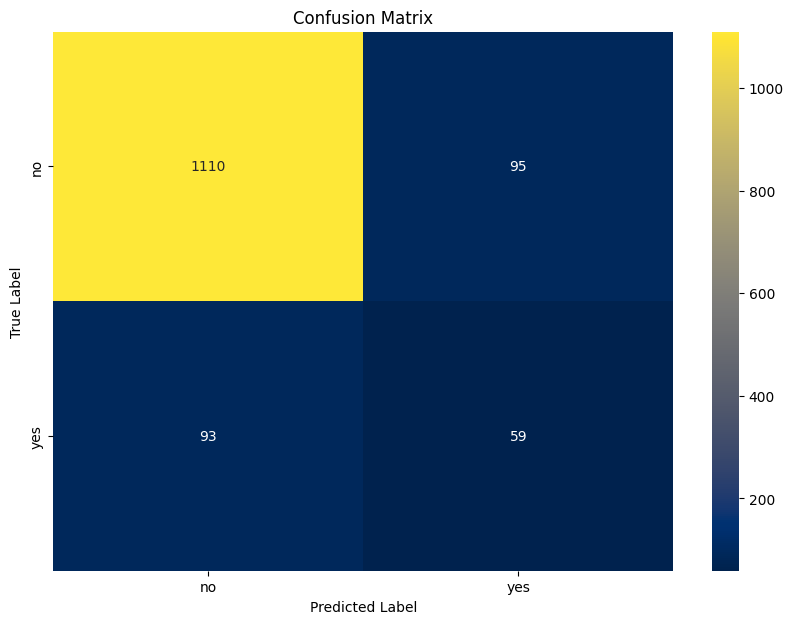

In [295]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='cividis', xticklabels=label_encoders['y'].classes_, yticklabels=label_encoders['y'].classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Insights

- **True Negatives (TN)**: 1110
- **False Positives (FP)**: 95
- **False Negatives (FN)**: 93
- **True Positives (TP)**: 59

- **High Accuracy for 'No' Predictions**: The model performs well at identifying customers who will not buy the service.
- **Challenges with 'Yes' Predictions**: The model has difficulty identifying customers likely to purchase the service, evident from the lower counts in the 'Yes' category.
- **Imbalance**: Reflects the imbalance between the two classes, highlighting the need for potential model improvement or rebalancing techniques.

### STEP 9: Visualize the Decision Tree Classifer

In [296]:
# Visualize the Decision Tree
plt.figure(figsize=(200,80))
plot_tree(clf, feature_names=X.columns, class_names=label_encoders['y'].classes_, filled=True)
plt.title('Decision Tree for Bank Marketing Prediction')
plt.show()


### Insights

- **Decision Rules**: The tree shows how decisions are made based on various features such as age, job, and balance.
- **Feature Importance**: Features with higher impact on predictions are prominently displayed at the top of the tree.
- **Model Transparency**: Provides a clear view of how the decision tree splits the data to classify customer outcomes.

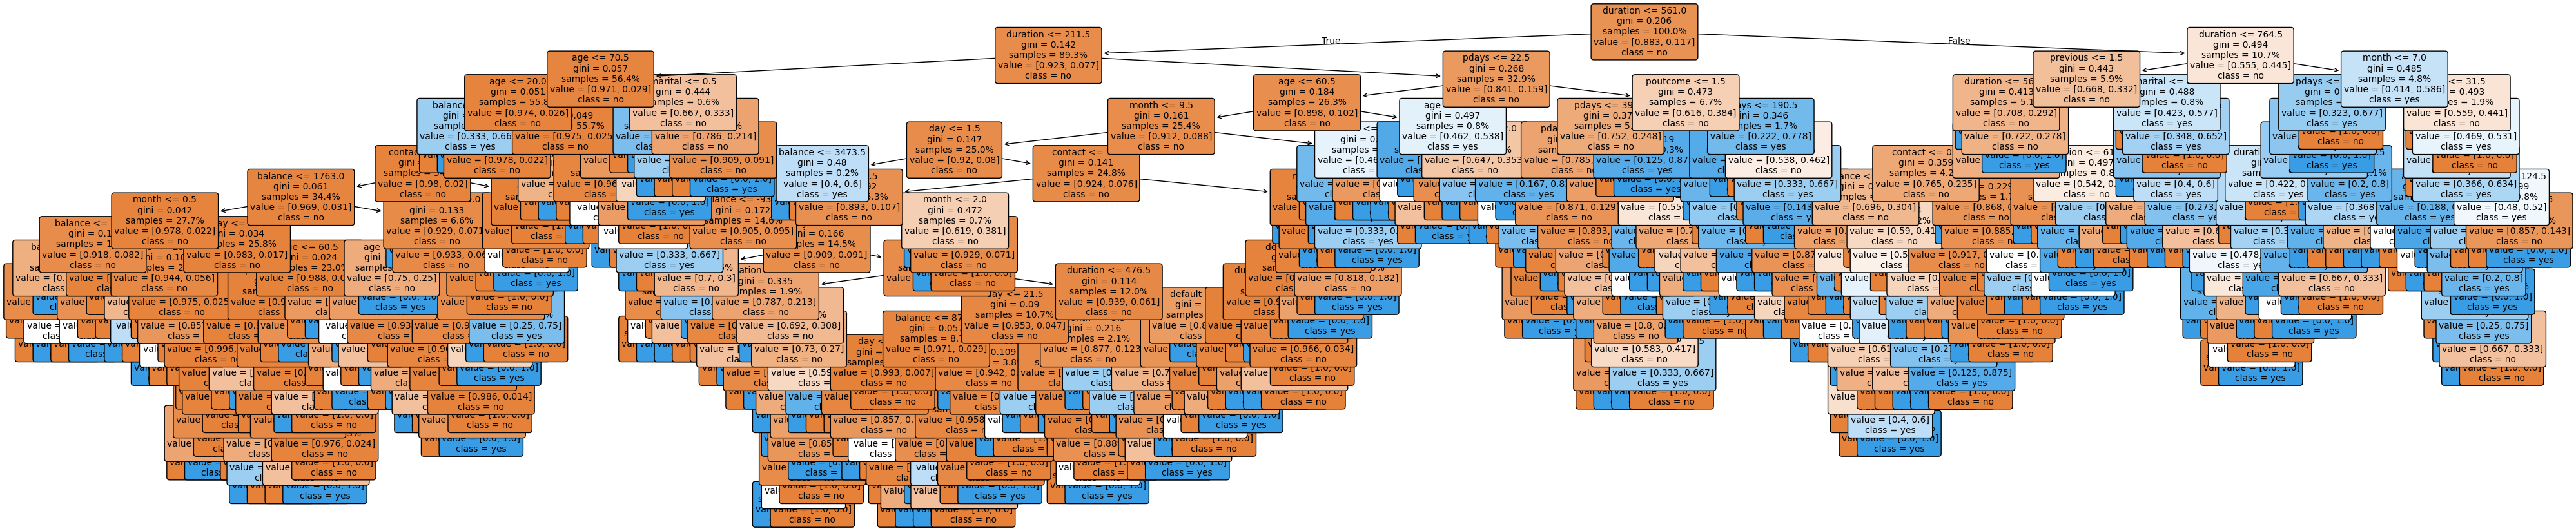

In [297]:
# Plot the decision tree

plt.figure(figsize=(50,10))
plot_tree(clf, 
          filled=True, 
          rounded=True, 
          feature_names=X.columns,  # Use the feature names from the DataFrame
          class_names=['no', 'yes'],  # Target classes
          proportion=True,  # Proportion of samples at each node
          fontsize=10)
plt.show()

### Insights

- **Decision Rules**: The plot illustrates how the model splits data based on features to make predictions.
- **Feature Influence**: Key features are shown at the top of the tree, revealing their importance in classification.
- **Model Interpretation**: The visual representation aids in understanding the decision-making process of the classifier, showing which paths lead to 'yes' or 'no' decisions.


### Key Insights

- **Confusion Matrix**: The model achieved 86.15% accuracy, effectively predicting most customer behaviors but struggled with the minority class (Yes).
- **Classification Report**: Precision, recall, and F1-score for the positive class (Yes) are lower due to class imbalance, though the model reliably predicts the majority class (No).
- **Decision Tree Visualization**: Provides clear decision rules and insights into how the model classifies customer data.

# Conclusion

The decision tree classifier effectively predicts whether a customer will purchase a product based on demographic and behavioral data from the UCI bank marketing dataset. It achieved an accuracy of 86.15%, demonstrating strong
performance in identifying non-purchasing customers. However, it struggles with predicting purchasing customers due to class imbalance, as reflected in lower precision, recall, and F1-score for the positive class. The decision tree visualization reveals how the model uses different features to make predictions. Overall, while the model is useful, improvements could be made by addressing class imbalance and exploring more advanced techniques for better accuracy on minority classes.


### AUTHOR : ARYA S

### LinkedIn : www.linkedin.com/in/arya-dataanalyst